In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# OJO que consume mucha memoria
df = pd.read_csv("Data/status.csv")

In [3]:
# Convierto el campo time en datetime
df.time = pd.to_datetime(df.time) 

print df


          station_id  bikes_available  docks_available                time
0                  2                2               25 2013-08-29 12:06:01
1                  2                2               25 2013-08-29 12:07:01
2                  2                2               25 2013-08-29 12:08:01
3                  2                2               25 2013-08-29 12:09:01
4                  2                2               25 2013-08-29 12:10:01
5                  2                2               25 2013-08-29 12:11:01
6                  2                2               25 2013-08-29 12:12:01
7                  2                2               25 2013-08-29 12:13:01
8                  2                2               25 2013-08-29 12:15:01
9                  2                2               25 2013-08-29 12:16:02
10                 2                2               25 2013-08-29 12:18:01
11                 2                2               25 2013-08-29 12:19:01
12                 2     

In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71984434 entries, 0 to 71984433
Data columns (total 4 columns):
station_id         71984434 non-null int64
bikes_available    71984434 non-null int64
docks_available    71984434 non-null int64
time               71984434 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 GB


In [5]:
df.describe()

,station_id,bikes_available,docks_available
count,7.198443e+07,7.198443e+07,7.198443e+07
mean,4.253149e+01,8.394812e+00,9.284729e+00
std,2.376117e+01,3.993586e+00,4.175442e+00
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,2.400000e+01,6.000000e+00,6.000000e+00
50%,4.200000e+01,8.000000e+00,9.000000e+00
75%,6.300000e+01,1.100000e+01,1.200000e+01
max,8.400000e+01,2.700000e+01,2.700000e+01


In [ ]:
#days = {'Monday':'0', 'Tuesday':'1','Wednesday':'2', 'Thursday':'3', 'Friday':'4', 'Saturday':'5', 'Sunday':'6'}
#def weekday_and_hour(x):
#    return (days[x.weekday_name] + str(x.hour))

#df['weekday_and_hour'] = df['time'].apply(weekday_and_hour)

#df.groupby(lambda x: df[df.index == x].time.dt.year).size()


In [6]:
# Agrego el campo weekday y hour, y elimino time para liberar un poco la memoria
df['weekday'] =  pd.to_datetime(df['time']).dt.weekday_name
df['hour'] = pd.to_datetime(df['time']).dt.hour
df = df.drop('time', 1)

In [7]:
df_station = df[df.station_id == 70]
print df_station
#dfGrouped = df.groupby(['weekday',df.hour-(df.hour%2)])['bikes_available'].count()
#print dfGrouped

          station_id  bikes_available  docks_available   weekday  hour
14758702          70                0               19  Thursday    12
14758703          70                0               19  Thursday    12
14758704          70                0               19  Thursday    12
14758705          70                0               19  Thursday    12
14758706          70                0               19  Thursday    12
14758707          70                0               19  Thursday    12
14758708          70                0               19  Thursday    12
14758709          70                0               19  Thursday    12
14758710          70                0               19  Thursday    12
14758711          70                0               19  Thursday    12
14758712          70                0               19  Thursday    12
14758713          70                1               18  Thursday    12
14758714          70                1               18  Thursday    12
147587

In [10]:
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
print dfGrouped

weekday    hour
Friday     0       14.512561
           2       14.518023
           4       14.528550
           6       12.646993
           8        5.416215
           10       4.606919
           12       5.836896
           14       7.205592
           16      10.827782
           18      11.075239
           20      10.947545
           22      11.739525
Monday     0       12.972193
           2       12.995700
           4       13.047342
           6       11.013932
           8        4.350068
           10       4.656974
           12       5.774140
           14       6.310770
           16      10.567208
           18      13.104953
           20      12.804606
           22      13.707259
Saturday   0       11.996088
           2       12.127160
           4       12.204269
           6       12.148692
           8       11.891951
           10      11.178977
                     ...    
Thursday   12       5.428458
           14       6.632330
           16      11.33583

<IPython.core.display.Javascript object>


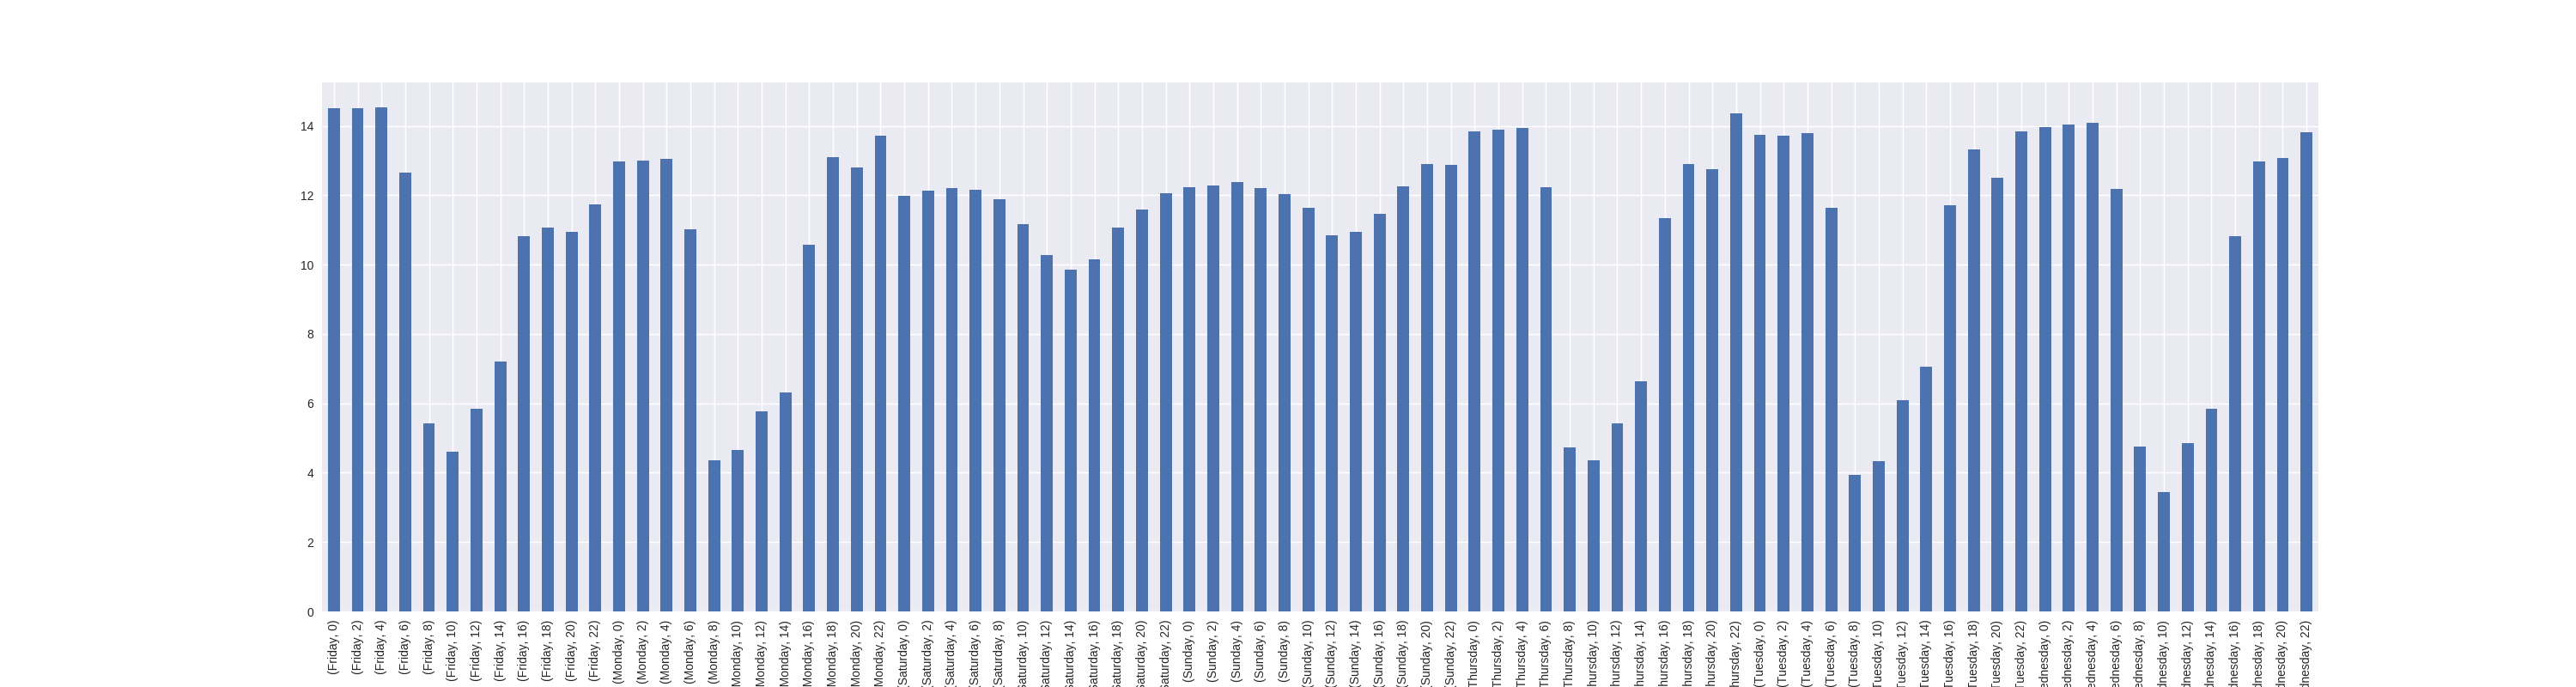

In [11]:
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8))

In [12]:
df

,station_id,bikes_available,docks_available,weekday,hour
0,2,2,25,Thursday,12
1,2,2,25,Thursday,12
2,2,2,25,Thursday,12
3,2,2,25,Thursday,12
4,2,2,25,Thursday,12
5,2,2,25,Thursday,12
6,2,2,25,Thursday,12
7,2,2,25,Thursday,12
8,2,2,25,Thursday,12
9,2,2,25,Thursday,12
